## 영상처리기본

## 1. 이미지 channel

### 1-1. RGB 색공간

* 이미지를 구성하는 기본 단위는 픽셀(Pixel)
* 픽셀 하나의 색을 결정하는 방법 중 RGB 색공간은 널리 사용되는 모델 중 하나입니다.
* Red, Green, Blue 3개의 색을 조합하여 픽셀의 색을 결정하기 때문에 하나의 픽셀이 3개의 채널을 가짐.
* 픽셀의 각 채널은 0~255사이의 값을 가짐
* Red=255,Green=255,Blue=255 : 세 채널이 모두 255이면 흰색
* Red=0,Green=0,Blue=0 : 세 채널이 모두 0이면 검정색

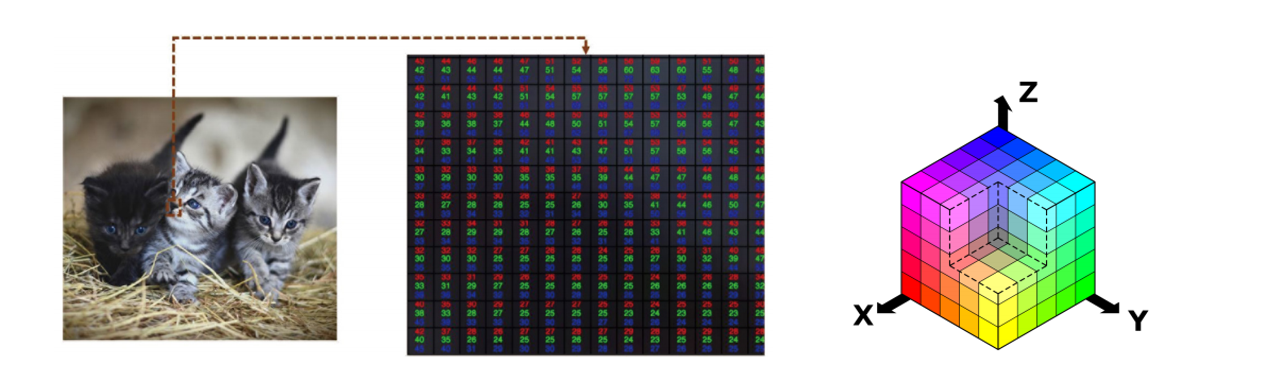

### 1-2. Grayscale 색공간

* 픽셀의 밝기를 저장하는 1개의 채널만 가진 색공간
* 컬러 정보 없음.
* 채널값이 0이면 검은색
* 채널값이 255이면 흰색
* 사이값은 회색 계열


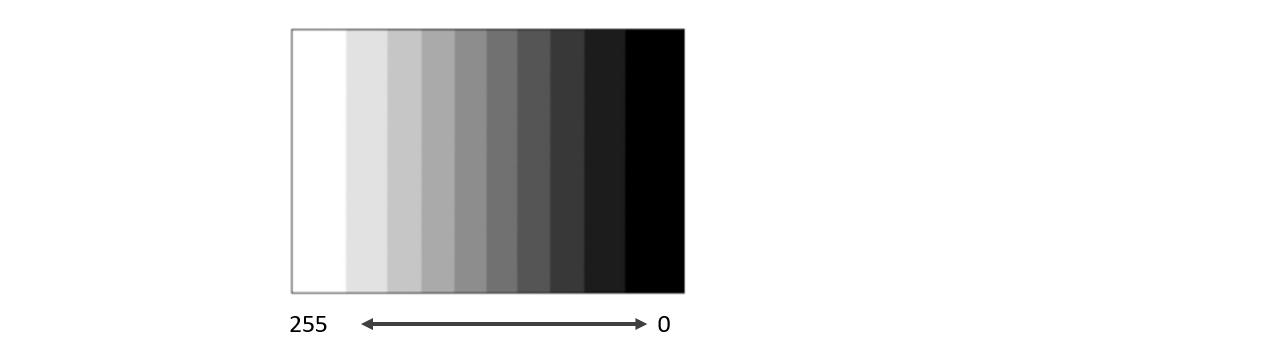

### 1-3. HSV 색공간

* 색상(Hue), 채도(Saturation), 명도(value)를 사용하여 색을 결정
* Hue 성분은 일정한 간격을 두고 주요색이 배치되어 있음
* Hue 성분만 사용하여 원하는 색 지정
* Hue 성분의 범위는 ```0~179```

* 색이 선명할수록 채도가 높음 (0~255)
* 색이 밝을수록 명도가 높음 (0~255)

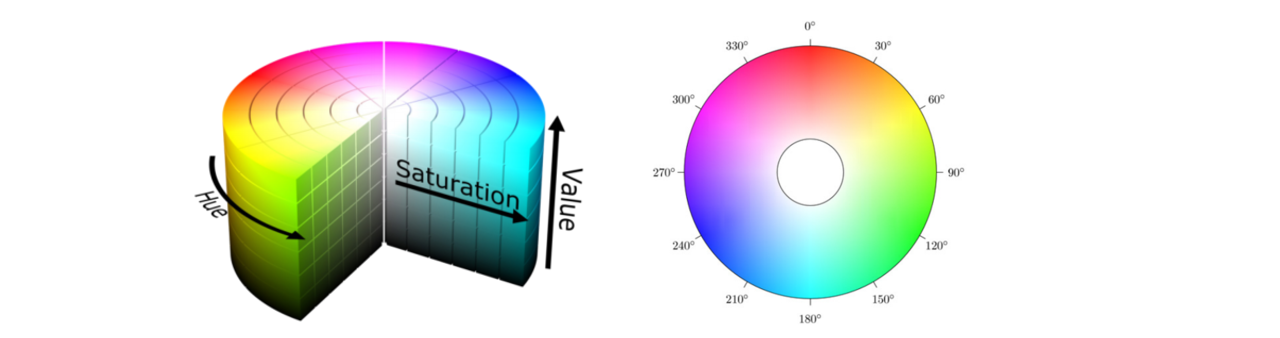

```
[참고]
Hue 성분은 0~359도가 아닌 0~179도로 표현하나요? 그림보니 360도인데????
```

Hue 값은 색상 환경을 0부터 360도까지의 각도로 나타낼 수 있습니다. 

그러나 OpenCV에서는 Hue 값을 0부터 179까지로 제한한 이유는 360도를 180도로 나누어 표현함으로써 정수형으로 표현할 때 더 간단하고 계산이 효율적으로 이루어지기 때문입니다. 

즉, 0에서 179까지의 범위는 0에서 359까지의 각도를 2로 나누어 정수로 표현한 것과 동일합니다



---

### 2. 픽셀과 이미지

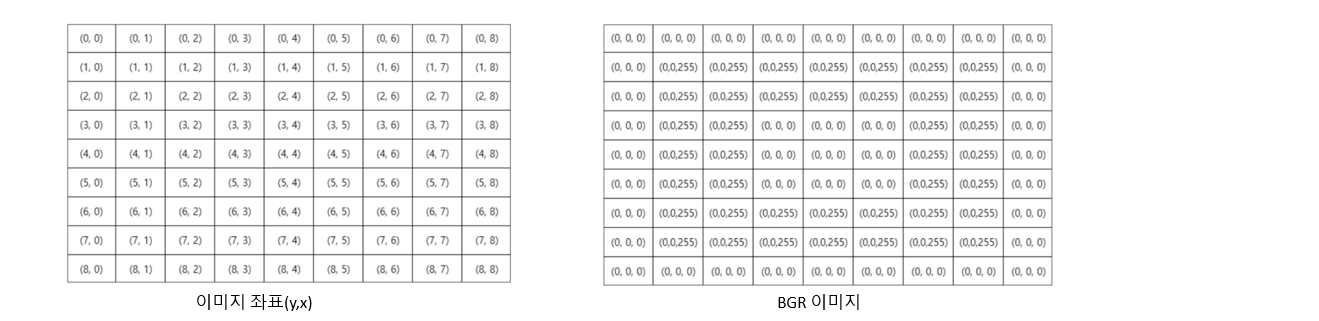

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("colorimage_rgbyw.png", cv2.IMREAD_COLOR) #컬러 이미지로 읽기
image.shape

# 이미지 사이즈는 세로:5, 가로: 5, 채널:3으로 구성됨

(5, 5, 3)

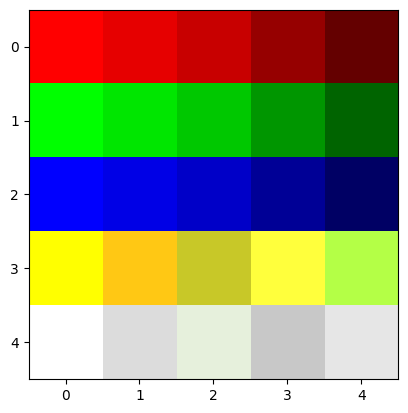

In [9]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #matplotlib에서는 RGB체계를 가지므로 변환

In [10]:
image

array([[[  0,   0, 255],
        [  0,   0, 230],
        [  0,   0, 200],
        [  0,   0, 150],
        [  0,   0, 100]],

       [[  0, 255,   0],
        [  0, 230,   0],
        [  0, 200,   0],
        [  0, 150,   0],
        [  0, 100,   0]],

       [[255,   0,   0],
        [230,   0,   0],
        [200,   0,   0],
        [150,   0,   0],
        [100,   0,   0]],

       [[  0, 255, 255],
        [ 20, 200, 255],
        [ 40, 200, 200],
        [ 60, 255, 255],
        [ 70, 255, 180]],

       [[255, 255, 255],
        [220, 220, 220],
        [220, 240, 230],
        [200, 200, 200],
        [230, 230, 230]]], dtype=uint8)

## 2. 이미지 이진화

* 그레이 스케일 이미지를 바이너리(Binary)이미지로 변화하는 방법
* 임계값 threshold를 기준으로 그레이 스케일 이미지를 흰색 영역과 검은색 영역으로 분리

```
[질문] 그런데 왜 이미지 이진화가 필요한가요? 
단순화하여 처리 효율성이 높아지는 장점이 있습니다. 
그리고 특징 추출에 용이합니다. 

- 대조 강조: 이진화는 이미지에서 대비를 강조할 수 있습니다.  이진화를 통해 대조를 뚜렷하게 만들 수 있습니다.

- 패턴 및 특징 추출: 이진화된 이미지는 패턴 및 특징을 추출하는 데 사용될 수 있습니다. 객체 인식, 모서리 감지 및 형상 분석과 같은 작업에서 흑백 이미지를 사용하여 더 간단하고 효과적인 기능을 수행할 수 있습니다.

```


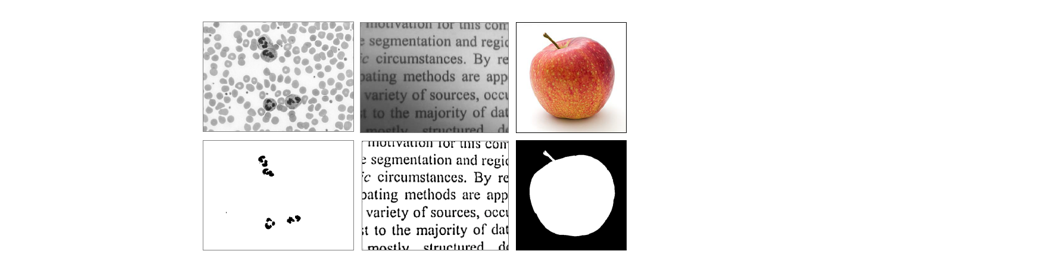

In [5]:
import cv2 
import sys


image = cv2.imread("colorimage_rgbyw.png", cv2.IMREAD_COLOR) #컬러 이미지로 읽기

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray



array([[ 76,  69,  60,  45,  30],
       [150, 135, 117,  88,  59],
       [ 29,  26,  23,  17,  11],
       [226, 196, 182, 233, 211],
       [255, 220, 235, 200, 230]], dtype=uint8)

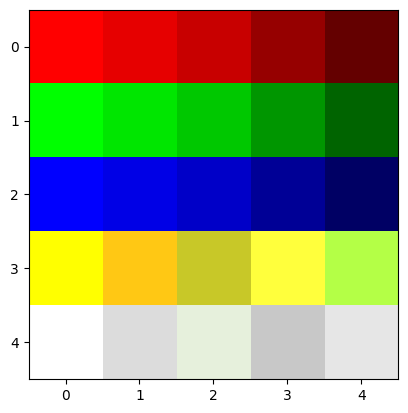

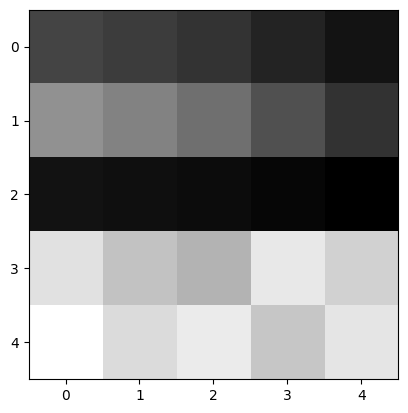

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #matplotlib에서는 RGB체계를 가지므로 변환
plt.show()
# 그레이스케일 이미지 출력
plt.imshow(img_gray, cmap='gray')
plt.show()

> 관심영역을 흰색으로 만들어라.

### 파란색을 추출하라
* 관심영역을 흰색으로 만들기

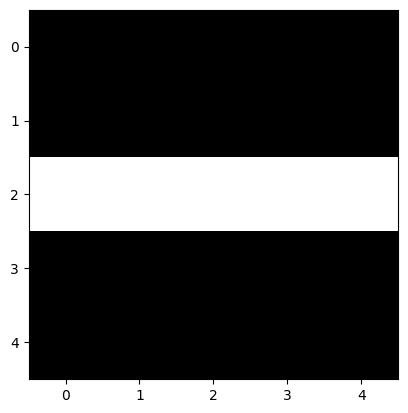

In [7]:

# img_gray: 이진화할 그레이스케일 이미지
# thresh: 사용할 임계값입니다. 이 임계값을 기준으로 픽셀이 이진화
# maxval: 임계값을 넘는 픽셀에 적용되는 최대값
# type: 이진화 방법을 지정
# 대표적인 값으로는 cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV

retval,img_binary = cv2.threshold(img_gray,29,255, cv2.THRESH_BINARY_INV)

plt.imshow(img_binary, cmap='gray')
plt.show()

In [14]:
img_binary

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

> 이진화를 하면 0과 255로 이미지가 표현된다.

----

## 3. 이미지 비트 연산

* 비트연산은 AND, OR, NOT, XOR연산을 말한다.
* 비트연산은 이미지에서 특정 영역을 추출할 때 유용하게 사용된다. 
* 예를 들면 이미지에서 바탕을 제거하고, 2개의 이미지를 합치는 경우입니다.

### bitwise_and()

* 둘다 0이 아닌경우만 값을 통과 시킴
* 즉 mask가 검정색이 아닌 경우만 통과가 되기때문에 mask영역 이외는 모두 제거됨.

In [5]:
import cv2 
import sys


image = cv2.imread("colorimage_rgbyw.png", cv2.IMREAD_COLOR) #컬러 이미지로 읽기
  
# 이미지를 hsv로 변환 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hsv

array([[[  0, 255, 255],
        [  0, 255, 230],
        [  0, 255, 200],
        [  0, 255, 150],
        [  0, 255, 100]],

       [[ 60, 255, 255],
        [ 60, 255, 230],
        [ 60, 255, 200],
        [ 60, 255, 150],
        [ 60, 255, 100]],

       [[120, 255, 255],
        [120, 255, 230],
        [120, 255, 200],
        [120, 255, 150],
        [120, 255, 100]],

       [[ 30, 255, 255],
        [ 23, 235, 255],
        [ 30, 204, 200],
        [ 30, 195, 255],
        [ 42, 185, 255]],

       [[  0,   0, 255],
        [  0,   0, 220],
        [ 45,  21, 240],
        [  0,   0, 200],
        [  0,   0, 230]]], dtype=uint8)

In [6]:
import numpy as np

# 흰색 범위 설정 (HSV 색 공간에서의 최소 및 최대 값)
lower = np.array([0, 0, 200], dtype=np.uint8)
upper = np.array([180, 30, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower, upper)
mask




array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255]], dtype=uint8)

In [7]:

# 흰색 영역 이외는 검은색으로 출력 
result = cv2.bitwise_and(hsv, hsv, mask=mask)
result

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 220],
        [ 45,  21, 240],
        [  0,   0, 200],
        [  0,   0, 230]]], dtype=uint8)

In [15]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_HSV2RGB)) #matplotlib에서는 RGB체계를 가지므로 변환
plt.show()

NameError: name 'plt' is not defined

### 노란색을 추출하라

In [10]:
import numpy as np

image = cv2.imread("colorimage_rgbyw.png", cv2.IMREAD_COLOR) #컬러 이미지로 읽기(BGR체계)
  
# 이미지를 hsv로 변환 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 노란색 범위 설정 (HSV 색 공간에서의 최소 및 최대 값)
lower = np.array([20, 160, 160], dtype=np.uint8)
upper = np.array([50, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsv, lower, upper)


# 관심영역 이외는 검은색으로 출력 
result = cv2.bitwise_and(hsv, hsv, mask=mask)
mask

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0]], dtype=uint8)

In [13]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_HSV2RGB)) #matplotlib에서는 RGB체계를 가지므로 변환
plt.show()

NameError: name 'plt' is not defined

## ROI

In [2]:
import numpy as np

image = cv2.imread("colorimage_rgbyw.png", cv2.IMREAD_COLOR) #컬러 이미지로 읽기(BGR체계)
  
# 이미지를 hsv로 변환 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 노란색 범위 설정 (HSV 색 공간에서의 최소 및 최대 값)
lower = np.array([20, 160, 160], dtype=np.uint8)
upper = np.array([50, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsv, lower, upper)


# 관심영역 이외는 검은색으로 출력 
result = cv2.bitwise_and(hsv, hsv, mask=mask)


############### ROI ######################
height, width = image.shape[:2]
roi_top = height * 2 // 3 # 상단 경계 (//나누기의 몫을 가리킴)
roi_bottom = height # 하단 경계 
roi_left = 0 # 왼쪽 경계 
roi_right = width # 오른쪽 경계 

roi = result[roi_top:roi_bottom, roi_left:roi_right]

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_HSV2RGB)) #matplotlib에서는 RGB체계를 가지므로 변환
plt.show()

NameError: name 'cv2' is not defined

## 컨투어 Conturs

* 특정 영역의 경계를 따라 같은 픽셀값을 갖는 지점을 연결하는 선이다.
* 대상의 외형을 파악하는데 유용
* 모양 분석이나 오브젝트 검출을 위한 전처리로 사용됨

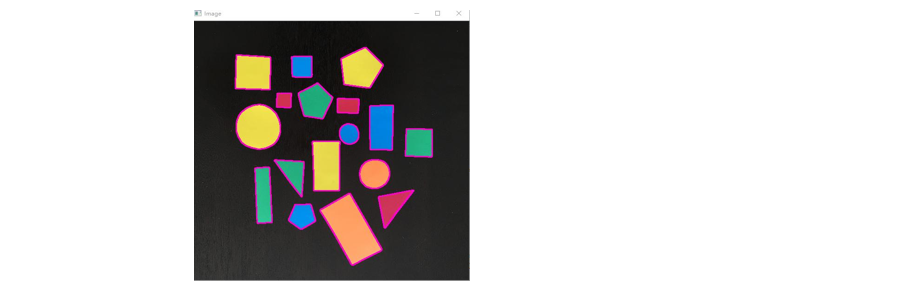